In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from skimage import io
from PIL import Image
import matplotlib.image as im
from numpy import asarray


Using TensorFlow backend.


In [14]:
#im.open(os.path.join('/content/drive/MyDrive/project data/train/apple_1.jpg')).resize(200,200)
img=Image.open(os.path.join('C:/train/apple_1.jpg'))
print(img)
type(img)
data=asarray(img)
#a=np.ndarray(img)

#.convert('L')
#img.resize((200,200))
#img.size

img1=img.resize((32,32))
img1.size
img1.resize((500,500))
data.shape

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=349x349 at 0x1E40009AEC8>


(349, 349, 4)

In [17]:
import cv2
train_images_data=[]
train_images_labels=[]
shape=(200,200)
for i in os.listdir('C:/train'):
  if i.split('.')[1] == 'jpg':
    #print(i)
    img = Image.open(os.path.join('C:/train',i))
    #img=im.imread(os.path.join('/content/drive/MyDrive/project data/train',i))
    #np.asarray(img)
    img=img.resize((200,200))
    #print(img)
    img=np.array(img)
    #print(img.shape)
    if(img.shape==(200,200)):
        #img=img.reshape((200,200,3))
        os.remove('C:/train/'+i)
    if(img.shape==(200,200,4)):
        c='C:/train/'+i
        os.remove('C:/train/'+i)
    #if(img.shape[2]):
      #img=img.reshape((200,200,3))
    #print(img.shape[2])
    #print(i)
    train_images_data.append(img)
    train_images_labels.append(i.split('_')[0])
print(train_images_data[0].shape)
train_images_labels = pd.get_dummies(train_images_labels).values
train_images_data = np.array(train_images_data)
print(train_images_data.shape)
x_train,x_val,y_train,y_val = train_test_split(train_images_data,train_images_labels,random_state=1)
#print(train_images_labels)


(200, 200, 3)
(214, 200, 200, 3)


In [19]:
test_images_data=[]
test_images_labels=[]
for i in os.listdir('C:/test'):
  if i.split('.')[1] == 'jpg':
    img = Image.open(os.path.join('C:/test',i))
    #img = im.imread(os.path.join('/content/drive/MyDrive/project data/test',i))
    img = img.resize((200,200))
    img=np.array(img)
    print(img.shape)
    if(img.shape==(200,200)):
        print(i)
        #img=img.reshape((200,200,3))
        os.remove('C:/test/'+i)
    if(img.shape==(200,200,4)):
        #print(i)
        c='C:/train/'+i
        os.remove('C:/test/'+i)
    #img=img.reshape((200,200,1))
    test_images_data.append(img)
    test_images_labels.append(i.split('_')[0])
test_images_data = np.array(test_images_data)
test_images_labels = pd.get_dummies(test_images_labels).values

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


[0 0 1 0]


(200, 200, 3)

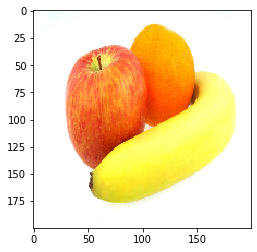

In [20]:
print(train_images_labels[140])
plt.imshow(train_images_data[140])
train_images_data[14].shape

[0 1 0 0]


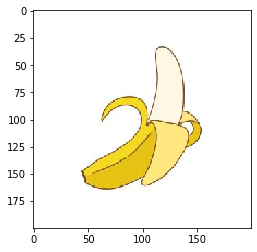

In [21]:
print(train_images_labels[70])
plt.imshow(train_images_data[70])

In [25]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = tf.keras.Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_2 (Flatten)          (None, 63480)            

In [26]:
history = model.fit(x_train,y_train,epochs=30,batch_size=50,validation_data=(x_val,y_val))

Train on 160 samples, validate on 54 samples
Epoch 1/30
160/160 [==============================] - 13s 81ms/sample - loss: 4.4780 - acc: 0.3125 - val_loss: 1.9053 - val_acc: 0.3333
Epoch 2/30
160/160 [==============================] - 13s 81ms/sample - loss: 1.7153 - acc: 0.3438 - val_loss: 2.7762 - val_acc: 0.2222
Epoch 3/30
160/160 [==============================] - 13s 81ms/sample - loss: 2.4608 - acc: 0.2562 - val_loss: 2.7620 - val_acc: 0.2593
Epoch 4/30
160/160 [==============================] - 14s 88ms/sample - loss: 1.8667 - acc: 0.3250 - val_loss: 1.9289 - val_acc: 0.2963
Epoch 5/30
160/160 [==============================] - 15s 93ms/sample - loss: 1.4666 - acc: 0.4500 - val_loss: 1.6906 - val_acc: 0.3889
Epoch 6/30
160/160 [==============================] - 16s 101ms/sample - loss: 2.4798 - acc: 0.3875 - val_loss: 2.3711 - val_acc: 0.2593
Epoch 7/30
160/160 [==============================] - 15s 94ms/sample - loss: 1.8468 - acc: 0.3000 - val_loss: 2.0814 - val_acc: 0.5000
Ep

In [16]:
x_train[0]

array([[[161, 105,  82],
        [161, 105,  82],
        [163, 107,  84],
        ...,
        [115,  71,  58],
        [113,  69,  56],
        [113,  69,  56]],

       [[169, 113,  88],
        [169, 113,  88],
        [169, 113,  88],
        ...,
        [116,  74,  62],
        [115,  73,  61],
        [115,  73,  61]],

       [[178, 122,  97],
        [178, 122,  97],
        [178, 122,  97],
        ...,
        [120,  80,  68],
        [116,  76,  64],
        [116,  76,  64]],

       ...,

       [[213, 176, 168],
        [213, 176, 170],
        [211, 172, 165],
        ...,
        [174, 150, 150],
        [165, 138, 143],
        [152, 136, 147]],

       [[214, 179, 173],
        [214, 177, 169],
        [215, 174, 168],
        ...,
        [173, 144, 148],
        [180, 149, 155],
        [165, 149, 159]],

       [[216, 183, 178],
        [215, 176, 169],
        [211, 171, 163],
        ...,
        [172, 141, 147],
        [174, 141, 148],
        [158, 143, 150]]